In [34]:
from collections import Counter

import seaborn as sns
from contextualized_topic_models.utils.data_preparation import TopicModelDataPreparation
from contextualized_topic_models.utils.preprocessing import WhiteSpacePreprocessingStopwords
from nltk.corpus import stopwords

from src.dataset import YouTrackIssueDataset

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
dataset = YouTrackIssueDataset("data/pycharm_issues.json")
len(dataset)

22014

<AxesSubplot:>

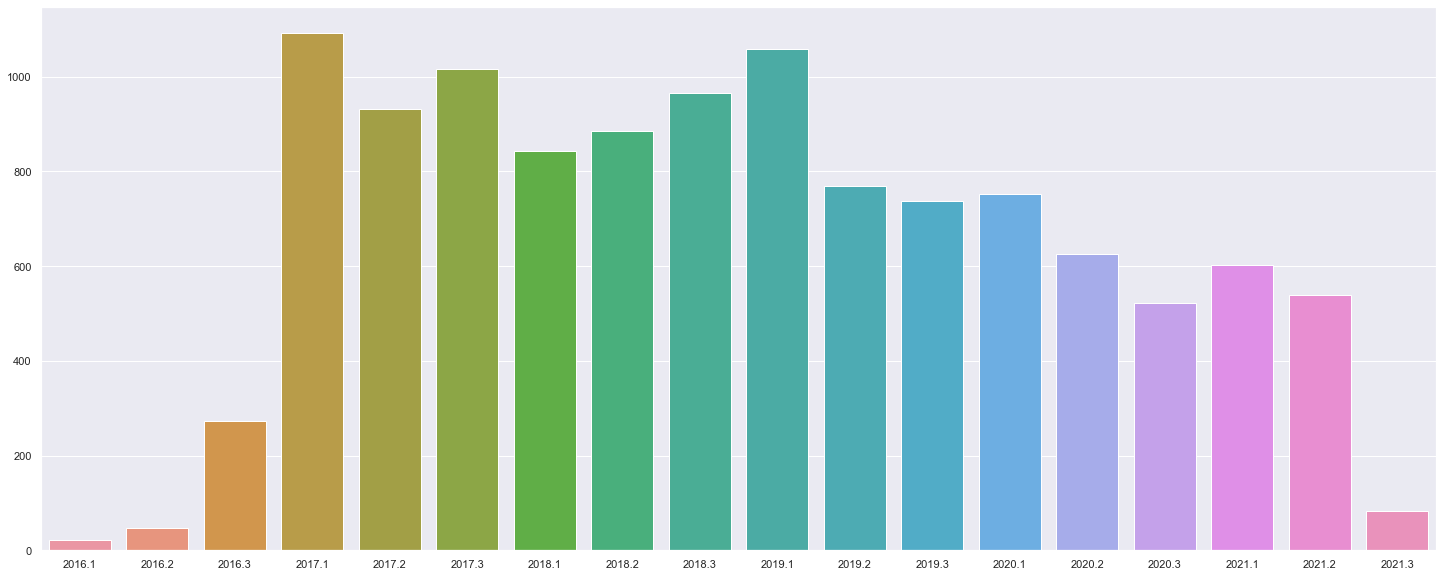

In [20]:
version_counts = Counter([it for v in dataset for it in v.affected_versions])
version_counts = sorted(version_counts.items(), key=lambda x: int(x[0][:4] + x[0][-1]))
versions, counts = zip(*version_counts)

sns.set_theme(rc={"figure.figsize": (25, 10)})
sns.barplot(x=list(versions), y=list(counts))

In [35]:
%%time
documents = [dataset[i][0] for i in range(len(dataset))]
sp = WhiteSpacePreprocessingStopwords(documents, stopwords_list=stopwords.words("english"))
preprocessed_documents, unpreprocessed_corpus, vocab = sp.preprocess()

CPU times: user 7.76 s, sys: 107 ms, total: 7.87 s
Wall time: 7.92 s


In [36]:
preprocessed_documents[:2]

['parameter foo false inspection qt calls getting false incorrect call argument inspection warnings code used pass inspections fine code without issue examples code box pycharm parameter box select image code code class def init self pycharm parameter flags super init code',
 'python extract incorrect order classes base class new added original base class end example python class good object def foo self return good class bad object def foo self return bad class good bad def foo self return super self foo class good bad def foo self return super self foo assert foo good assert foo good print ok would like extract new class previous good foo running extract get python class good object def foo self return good class bad object def foo self return bad class good def foo self return super self foo class bad pass class good bad def foo self return super self foo assert foo good assert foo good print ok fails incorrect order correct order class bad since good']

In [37]:
unpreprocessed_corpus[:2]

['"Parameter foo unfilled": false positives for inspection of Qt calls I\'m getting false "Incorrect call argument" inspection warnings for code that used to pass inspections just fine.  The code executes without issue.\n\nSome examples:\n\n{code}\nh_box = QHBoxLayout()\n# PyCharm claims that parameter \'alignment\' is unfilled.\nh_box.addWidget(QLabel(\'Select an image:\'))\n{code}\n\n{code}\nclass MainWindow(QMainWindow):\n    def __init__(self):\n        # PyCharm claims that parameter \'flags\' is unfilled.\n        super().__init__()\n{code}',
 'Python Extract Superclass: Incorrect Order of Inherited Classes When extracting superclasses, if extractions includes a base class, new superclass should be added where original base class appeared (and not appended at end).\n\nFor example, before extraction:\n```python\nclass Good(object):\n    def foo(self):\n        return "good"\n\n\nclass Bad(object):\n    def foo(self):\n        return "bad"\n\n\nclass B1(Good, Bad):\n    def foo(sel

In [ ]:
%%time
tp = TopicModelDataPreparation("t5-small")
training_dataset = tp.fit(text_for_contextual=unpreprocessed_corpus, text_for_bow=preprocessed_documents)

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.84k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/242M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/792k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Batches:   0%|          | 0/111 [00:00<?, ?it/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
